In [1]:
import keras
print(keras.__version__)

2.10.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# 단어는 1만개 까지만 표현하겠다! - keras 에서 제공하는 기능

In [3]:
train_data.shape    # 총 2만 5천개의 리뷰 0은 부정적, 1은 긍정적 리뷰

(25000,)

In [4]:
train_data[0]   # 단어들이 숫자로 전처리 되어있음

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0] # 긍정적인 리뷰

1

In [6]:
word_index = imdb.get_word_index()
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # i-3? -> word_index의 0~2까지 값은 특수문자로, 내용 해석에 도움이 안되므로 아예 못 찾게 만드는 구문
# 만약 0,1,2에 해당하는, 혹은 index에 없는 데이터를 호출하려고 하면 ?가 반환됨!
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [25]:
# 데이터를 준비

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1

    return results

# Data의 Encoding

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [17]:
# 순차적으로 반복하는 뭔가를 만들 때 enumerate 사용 ex) index 번호 주기

for i, c in enumerate(['A','B','C'], start=1):
    print(i, c)

1 A
2 B
3 C


In [21]:
temp = enumerate(['A','B','C'])
list(temp)  # 타입 변환도 가능!

[(0, 'A'), (1, 'B'), (2, 'C')]

In [26]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [27]:
# 데이터를 float type로 변환

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [52]:
# 신경망의 구축

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
# 이진분류다? -> binary crossentropy
# 오버피팅을 막기 위해 제약을 주어야 한다! -> learning_rate 입력

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
    loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# 데이터 슬라이싱

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
history = model.fit(partial_X_train,
    partial_y_train, epochs=20, batch_size=512,
    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5126 - accuracy: 0.7789 - val_loss: 0.3981 - val_accuracy: 0.8564
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3050 - accuracy: 0.9032 - val_loss: 0.3106 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2215 - accuracy: 0.9282 - val_loss: 0.2824 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1753 - accuracy: 0.9426 - val_loss: 0.2735 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1416 - accuracy: 0.9546 - val_loss: 0.2855 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1183 - accuracy: 0.9634 - val_loss: 0.3011 - val_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0968 - accuracy: 0.9725 - val_loss: 0.3244 - val_accuracy: 0.8833
Epoch 8/20
30

In [57]:
# 실험 결과 데이터를 가져온다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

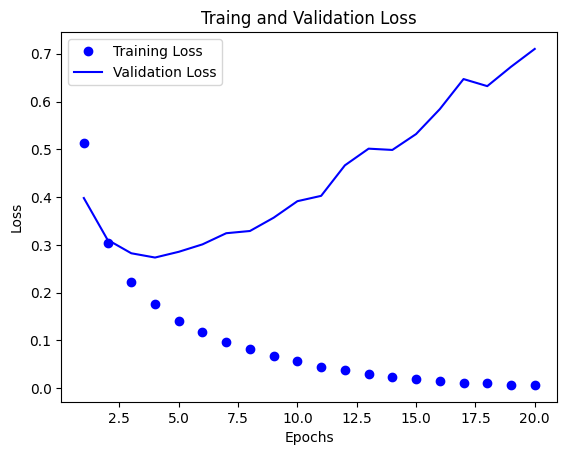

In [58]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Traing and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

반복 횟수가 늘어나면서 훈련 데이터에 오비피팅되어 일반적인 데이터에서 멀어짐

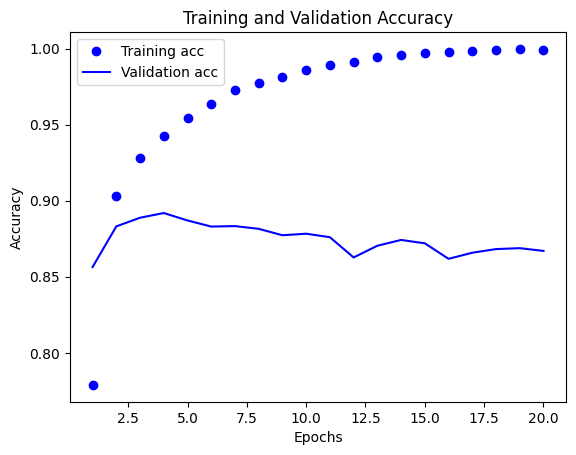

In [59]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

마찬가지로 3~4회차 정도가 가장 검증 데이터상 좋다는 것을 알 수 있음

In [51]:
# 모델값 초기화 후, 여기부터 재실행

history = model.fit(partial_X_train,
    partial_y_train, epochs=3, batch_size=512,
    validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 1s 26ms/step - loss: 0.5174 - accuracy: 0.7842 - val_loss: 0.3906 - val_accuracy: 0.8707
Epoch 2/3
30/30 [==============================] - 0s 15ms/step - loss: 0.3101 - accuracy: 0.9009 - val_loss: 0.3076 - val_accuracy: 0.8863
Epoch 3/3
30/30 [==============================] - 0s 14ms/step - loss: 0.2248 - accuracy: 0.9287 - val_loss: 0.2822 - val_accuracy: 0.8887
